<a href="https://colab.research.google.com/github/ChahineBA/Customer-Behaviour-Analysis-And-Prediction-Using-R/blob/main/Cutomers_Behaviour_Analysis_And_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
install.packages("stringi")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('ggrepel')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("superml")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the necessary libraries
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(forcats)
library(rpart)
library(rpart.plot)
library(caret)
library(scales)
library(superml)
library(corrplot)
library(reshape2)
library(broom)
library(ggpubr)

# Import Data

In [ ]:
# Read the dataset
data <- read_csv("/content/data.csv", show_col_types = FALSE)

In [ ]:
# Viewing data
head(data)

In [ ]:
# Overview of the dataset
glimpse(data)

The dataframe is **9994** instances and **21** features. Now check the summary of the dataframe.

In [ ]:
summary(data)

## Statistics in Sales, Quantity, Discount, and Profit

What piqued interest was the statistics in Sales, Quantity, Discount, and Profit columns. From there, we know that:

- **Sales** range from USD 0.44 to USD 22,638.48 per transaction; the average sales closed is USD 229.86 while a typical sale closed is USD 54.49.
- **Quantity sold** ranges from 1 to 14 items per transaction; typically, each transaction sold around 3 to 4 items.
- **Discount** ranges from USD 0 to USD 0.80, meaning this shop only gives minimal discounts to customers.
- **Profit** ranges from a loss of USD -6,599.98 to a profit of USD 8,399.98. The average profit per transaction is USD 28.66, but we know most of the profit is lower than that due to the median being lower than the mean.

On top of that, we also noticed that R is not able to identify which one is datetime format as they are parsed as characters.


# Data Pre-processing

In [ ]:
# Checking for missing values
missing_values <- sapply(data, function(x) sum(is.na(x)))
print(missing_values)

======> **0 Missing Values**

In [ ]:
# Checking for duplicates
duplicates <- sum(duplicated(data))
print(paste("Number of duplicates:", duplicates))

## Check Value Pattern Consistency

### Numerical Data
Numerical data in the dataset includes Sale, Quantity, Discount, and Profit. The pattern for the numerical data is studied. The aim is to determine for any irrelevant pattern in the dataset. To do so, histogram is plotted.

In [ ]:
hist(data$Discount)

### Graph 1: Histogram of data$Discount

**Description:**

- **X-Axis (data$Discount):** Represents the discount values.
- **Y-Axis (Frequency):** Represents the frequency of each discount value.
- **Shape & Distribution:**
  - The histogram shows a highly right-skewed distribution.
  - The majority of the data points are clustered at the lower end of the discount values.
  - There is a very high frequency of discounts at 0.0, followed by a significant drop and then a smaller peak at around 0.2.
  - Few values are present for discounts higher than 0.2.

**Interpretation:**

- Most transactions or items have very low or no discount.
- A notable portion has a discount around 0.2, but this is much less frequent than 0.0.
- Higher discounts are rare.


In [ ]:
hist(data$Quantity)

### Graph 2: Histogram of data$Quantity

**Description:**

- **X-Axis (data$Quantity):** Represents the quantity values.
- **Y-Axis (Frequency):** Represents the frequency of each quantity value.
- **Shape & Distribution:**
  - The histogram shows a right-skewed distribution.
  - The highest frequency is at the lower end of the quantity values (around 2).
  - As the quantity increases, the frequency decreases.
  - Quantities higher than 8 are very rare.

**Interpretation:**

- Most transactions involve small quantities of items.
- Larger quantities are less common, with very few transactions having quantities above 8.


In [ ]:
hist(data$Profit)

### Graph 3: Histogram of data$Profit

**Description:**

- **X-Axis (data$Profit):** Represents the profit values.
- **Y-Axis (Frequency):** Represents the frequency of each profit value.
- **Shape & Distribution:**
  - The histogram shows a distribution centered around zero.
  - There is a large spike at zero, indicating many transactions with no profit or loss.
  - Some transactions have negative profit (losses), and some have positive profit, but these are less frequent.
  - The spread of values ranges widely on both sides of zero.

**Interpretation:**

- Many transactions break even with no profit or loss.
- There are both profitable and loss-making transactions, but these are not as frequent as the break-even transactions.
- The distribution is somewhat symmetric around zero, suggesting a mix of small profits and small losses.


In [ ]:
hist(data$Sales)

## Interpretation of the Histogram

The histogram of `data$Sales` provides several insights into the distribution of the sales data:

1. **Right-Skewed Distribution**:
   - The histogram is highly right-skewed, indicating that most of the sales values are relatively low, with a long tail extending towards higher values. This suggests that while a few sales transactions have very high values, the majority are much lower.

2. **High Frequency of Low Sales Values**:
   - The tallest bar is at the lower end of the sales range (0-500), indicating that the majority of sales transactions fall within this range. This implies that low-value sales are very common in the dataset.

3. **Diminishing Frequency with Increasing Sales**:
   - As the sales values increase, the frequency of transactions decreases sharply. This trend is consistent throughout the histogram, showing a rapid decline in the number of transactions as the sales value rises.

4. **Potential Outliers**:
   - The long tail suggests that there might be some outlier sales transactions with exceptionally high values. These outliers are infrequent but significantly higher than the bulk of the data.

5. **Data Distribution Insight**:
   - The histogram gives a clear visual representation of the concentration of sales values, helping identify the central tendency and the spread of the data. Most of the sales are concentrated at the lower end, indicating that high-value sales are rare.

6. **Business Implications**:
   - For businesses, this distribution might indicate a need to investigate why high-value sales are rare and whether there are opportunities to increase them.
   - Understanding the distribution can help in planning and decision-making, such as targeting marketing efforts towards increasing the frequency of higher-value sales or focusing on high-volume low-value transactions to drive overall sales volume.

7. **Summary Statistics**:
   - While the histogram provides a visual summary, it might be useful to complement it with summary statistics like the mean, median, mode, and standard deviation to quantify the central tendency and dispersion of the sales data.

Overall, the histogram indicates a clear pattern in the sales data, with a heavy concentration of low-value transactions and a few high-value outliers, which can guide further analysis and strategic decisions.


In [ ]:
# Identifying outliers in numerical columns
numerical_columns <- c('Sales', 'Quantity', 'Discount', 'Profit')
quantiles <- data %>%
  select(all_of(numerical_columns)) %>%
  summarise(across(everything(), list(lower = ~ quantile(., 0.01), upper = ~ quantile(., 0.99))))
quantiles

In [ ]:
# Removing outliers
for (column in numerical_columns) {
  lower_bound <- quantiles[[paste(column, "lower", sep = "_")]]
  upper_bound <- quantiles[[paste(column, "upper", sep = "_")]]
  data <- data %>%
    filter((!!sym(column) >= lower_bound) & (!!sym(column) <= upper_bound))
}

### Categorical Data
Categorical data in this dataset includes Ship Mode, Segment, Country, City, State, Region, Category, and Sub-Category. The value pattern consistency is determined by counting the frequency distribution for each of the variable. Any weird naming value or redundancy can be determined from this method.

In [ ]:
table(data$`Ship Mode`)

In [ ]:
table(data$Segment)

In [ ]:
table(data$Country)

In [ ]:
table(data$City)

In [ ]:
table(data$State)

In [ ]:
table(data$Region)

In [ ]:
table(data$Category)

In [ ]:
table(data$`Sub-Category`)

**From the results, We have no redunduncies.**

# Exploratory Data Analysis

## Deeper Data Insights

In this section, we will drill deeper into the data for more insights. But first, we need to know what problems we want to solve and what questions to ask. Taking the POV of the owner of the Superstore:

### Overview

1. **What is the monthly sales and profit since inception?**

### Overview - Increase Revenue

1. **Which product category has the highest sales?**
2. **Which customer segment contributes to the highest sales?**
3. **Which region, state, and city contribute to the highest sales and profit?**


## Overview - Increase Revenue

In [ ]:
#Which product category and subcategory with highest sales, with and without discount?
df_category_sales <- data %>%
  select(Category, Sales) %>%
  group_by(Category) %>%
  summarise(Sales = sum(Sales))

In [ ]:
df_category_sales <- df_category_sales %>%
  mutate(Percentage = percent(df_category_sales$Sales/sum(df_category_sales$Sales)))

In [ ]:
df_category_sales

In [ ]:
library(ggplot2)
# Bar Chart for Category by Sales Breakdown
bar_category_sales <- ggplot(data=df_category_sales, aes(x=Category, y=Sales, fill=Category)) +
  coord_cartesian(ylim = c(500000, 650000)) + # Adjusted ylim to fit the given data
  ggtitle("Category by Sales Breakdown") +
  geom_bar(stat="identity") +
  geom_text(aes(label=Percentage, y=Sales + 10000), vjust=0, color="black", size=3.5)+
  theme_minimal()
bar_category_sales

Based on the provided data for sales breakdown by category:

- **Furniture**:
  - Total sales amount to approximately $615,871.9.
  - This category contributes to 37.2% of the total sales.

- **Office Supplies**:
  - Total sales amount to around $531,170.5.
  - This category accounts for 32.1% of the total sales.

- **Technology**:
  - Total sales amount to roughly $507,102.5.
  - This category constitutes 30.7% of the total sales.

From this data, we can conclude that Furniture contributes the most to the total sales, followed by Office Supplies and then Technology. However, the difference in sales between Furniture and Office Supplies is relatively small compared to the difference between Office Supplies and Technology. Further analysis could explore factors contributing to these sales figures and potential strategies for improving sales performance across all categories.


In [ ]:
#Which customer segment that contribute to the highest sales?
df_segment_sales <- data %>%
  select(Segment, Sales) %>%
  group_by(Segment) %>%
  summarise(Sales = sum(Sales))

df_segment_sales[ , 1] <- apply(df_segment_sales[ , 1], 2,
                    function(x) as.character(x))

sapply(df_segment_sales, class)

In [ ]:
#Inputting percentage column into the table
df_segment_sales <- df_segment_sales %>%
  mutate(Percentage = percent(df_segment_sales$Sales/sum(df_segment_sales$Sales)))
df_segment_sales

In [ ]:
#Pie Chart for Customer Segment Sales Contribution:
ggplot(df_segment_sales, aes(x = "", y = Sales, fill = Segment)) +
  ggtitle("Customer Segment Sales Contribution") +
  geom_col() +
   geom_label(aes(label = Percentage ),
             position = position_stack(vjust = 0.5),
             show.legend = FALSE) +
  coord_polar(theta = "y")

Based on the provided data for sales breakdown by segment:

- **Consumer**:
  - Total sales amount to approximately $837,045.7.
  - This segment contributes to 51% of the total sales.

- **Corporate**:
  - Total sales amount to around $521,550.0.
  - This segment accounts for 32% of the total sales.

- **Home Office**:
  - Total sales amount to roughly $295,549.2.
  - This segment constitutes 18% of the total sales.

From this data, we can conclude that the Consumer segment contributes the most to the total sales, followed by the Corporate segment and then the Home Office segment. Further analysis could explore factors contributing to these sales figures and potential strategies for improving sales performance across all segments.


In [ ]:
#Which region, state and city contribute to the highest sales?
df_region_sales <- data %>%
  select(Region, Sales) %>%
  group_by(Region) %>%
  summarise(Sales = sum(Sales))

In [ ]:
#Inputting percentage column into the table
df_region_sales <- df_region_sales %>%
    mutate(Percentage = percent(df_region_sales$Sales/sum(df_region_sales$Sales)))
df_region_sales

In [ ]:
bar_region_sales <- ggplot(data=df_region_sales, aes(x=Region, y=Sales, fill=Region)) +
  coord_cartesian(ylim = c(100000, 800000))+
  ggtitle("Region by Sales Breakdown") +
  geom_bar(stat="identity")+
  geom_text(aes(label=Percentage), vjust=1.6, color="white", size=3.5)+
  theme_minimal()
bar_region_sales

Based on the provided data for sales breakdown by region:

- **Central**:
  - Total sales amount to approximately $367,820.3.
  - This region contributes to 22.2% of the total sales.

- **East**:
  - Total sales amount to around $458,096.9.
  - This region accounts for 27.7% of the total sales.

- **South**:
  - Total sales amount to roughly $264,458.8.
  - This region constitutes 16.0% of the total sales.

- **West**:
  - Total sales amount to approximately $563,768.8.
  - This region contributes to 34.1% of the total sales.

From this data, we can conclude that the West region contributes the most to the total sales, followed by the East region, Central region, and then the South region. Further analysis could explore factors contributing to these sales figures and potential strategies for improving sales performance across all regions.


In [ ]:
df_state_sales <- data %>%
  select(State, Sales) %>%
  group_by(State) %>%
  summarise(Sales = sum(Sales))

df_state_sales <- df_state_sales[order(-df_state_sales$Sales),]

In [ ]:
df_state_sales <- df_state_sales %>%
  mutate(Percentage = percent(df_state_sales$Sales/sum(df_state_sales$Sales),accuracy = 0.01))
df_state_sales

In [ ]:
bar_state_sales <- ggplot(data=df_state_sales[1:10,], aes(x=State, y=Sales, fill=State)) +
  #coord_cartesian(ylim = c(300000, 800000))+
  geom_bar(stat="identity")+
  ggtitle("Top 10 Regions by Sales Breakdown") +
  geom_text(aes(label=Percentage), hjust=1.3, vjust=0.4, color="white", size=3)+
  theme_minimal()+
  coord_flip()
#bar_region_sales + scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9","#f5ad42"))
bar_state_sales

Based on the provided data for sales breakdown by state:

- **California**:
  - Total sales amount to approximately $354,867.814.
  - This state contributes to 21.45% of the total sales.

- **New York**:
  - Total sales amount to around $196,394.612.
  - This state accounts for 11.87% of the total sales.

- **Texas**:
  - Total sales amount to roughly $136,120.876.
  - This state constitutes 8.23% of the total sales.

- **Washington**:
  - Total sales amount to approximately $98,153.442.
  - This state contributes to 5.93% of the total sales.

(And so on for each state…)

From this data, we can conclude that California has the highest sales contribution, followed by New York, Texas, and Washington. Further analysis could explore factors contributing to these sales figures and potential strategies for improving sales performance in each state.


In [ ]:
df_city_sales <- data %>%
  select(City, Sales) %>%
  group_by(City) %>%
  summarise(Sales = sum(Sales))

df_city_sales <- df_city_sales[order(-df_city_sales$Sales),]

In [ ]:
df_city_sales <- df_city_sales %>%
  mutate(Percentage = percent(df_city_sales$Sales/sum(df_city_sales$Sales),accuracy = 0.01))
df_city_sales

In [ ]:
bar_city_sales <- ggplot(data=df_city_sales[1:10,], aes(x=City, y=Sales, fill=City)) +
  geom_bar(stat="identity")+
  ggtitle("Sales by City Breakdown") +
  geom_text(aes(label=Percentage), hjust=1.3, vjust=0.4, color="white", size=3)+
  theme_minimal()+
  coord_flip()

bar_city_sales

Based on the provided data for sales breakdown by city:

- **New York City**:
  - Total sales amount to approximately $158,712.894.
  - This city contributes to 9.59% of the total sales.

- **Los Angeles**:
  - Total sales amount to around $135,151.137.
  - This city accounts for 8.17% of the total sales.

- **Seattle**:
  - Total sales amount to roughly $83,611.864.
  - This city constitutes 5.05% of the total sales.

- **San Francisco**:
  - Total sales amount to approximately $82,763.005.
  - This city contributes to 5.00% of the total sales.

(And so on for each city…)

From this data, we can conclude that New York City has the highest sales contribution, followed by Los Angeles, Seattle, and San Francisco. Further analysis could explore factors contributing to these sales figures and potential strategies for improving sales performance in each city.


In [ ]:
# Distribution of Sales
sales_distribution <- data %>%
  summarise(Sales = list(summary(Sales))) %>%
  pull(Sales) %>%
  unlist()
print(sales_distribution)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   2.2860   17.2800   51.7500  172.4145  193.8450 2430.0800 


In [ ]:
# Distribution of Profit
profit_distribution <- data %>%
  summarise(Profit = list(summary(Profit))) %>%
  pull(Profit) %>%
  unlist()
print(profit_distribution)

In [ ]:
# Distribution plots for Sales and Profit
ggplot(data, aes(x = Sales)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.7) +
  geom_density(color = "red", size = 1) +
  ggtitle('Distribution des Ventes')

## Distribution des Ventes (Distribution of Sales)

### Histogram and Density Plot:

- **Histogram**: The histogram is represented by blue bars.
- **Density Plot**: A red line overlays the histogram, representing the kernel density estimate.

### Axis Labels:

- **X-axis**: Labeled as "Sales" with values ranging approximately from 0 to 2500.
- **Y-axis**: Labeled as "density," indicating the frequency of sales values.

### Distribution Shape:

- The distribution of sales is heavily right-skewed, with a high frequency of lower sales values.
- The density sharply peaks at low sales values and rapidly decreases, indicating that higher sales are less common.
- The tail extends far to the right, showing a small number of instances with very high sales.



In [ ]:
ggplot(data, aes(x = Profit)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "green", alpha = 0.7) +
  geom_density(color = "red", size = 1) +
  ggtitle('Distribution des Bénéfices')

## Distribution des Bénéfices (Distribution of Profits)

### Histogram and Density Plot:

- **Histogram**: The histogram is represented by green bars.
- **Density Plot**: A red line overlays the histogram, representing the kernel density estimate.

### Axis Labels:

- **X-axis**: Labeled as "Profit" with values ranging approximately from -200 to 600.
- **Y-axis**: Labeled as "density," indicating the frequency of profit values.

### Distribution Shape:

- The distribution of profits is sharply peaked around 0, suggesting that most profits are close to zero.
- There are fewer instances of higher profits, and the density tapers off as profits increase.
- There is a slight skew with a longer tail towards the positive side, indicating occasional higher profits, while negative profits (losses) are less frequent.


**Summary**:
- The profit distribution shows a sharp peak near zero with a slight positive skew, suggesting most transactions result in small profits with occasional higher profits.
- The sales distribution is heavily skewed to the right, indicating that most sales transactions are small, with fewer instances of significantly higher sales.

In [ ]:
# Create a boxplot
boxplot(data$Sales,
        main = "Boxplot of Sales",
        ylab = "Sales",
        xlab = "Data")

### Description of the Boxplot of Sales

The provided image is a boxplot that visualizes the distribution of sales data. Boxplots are useful for summarizing the central tendency, dispersion, and skewness of the data as well as for identifying outliers.

#### Components of the Boxplot:

1. **Title**:
   - The title of the plot is "Boxplot of Sales".

2. **Y-Axis (Sales)**:
   - The y-axis represents the sales values, ranging from 0 to approximately 2500.

3. **Box (Interquartile Range - IQR)**:
   - The box represents the interquartile range (IQR), which contains the middle 50% of the data.
   - The bottom of the box indicates the first quartile (Q1), and the top of the box indicates the third quartile (Q3).
   - The line inside the box represents the median (second quartile, Q2) of the sales data.

4. **Whiskers**:
   - The whiskers extend from the box to the smallest and largest values within 1.5 times the IQR from the first and third quartiles, respectively.

5. **Outliers**:
   - The points outside the whiskers are considered outliers.
   - There are many outliers in the sales data, indicated by the dots above the upper whisker, extending up to approximately 2500.

#### Interpretation:

- **Median**:
  - The median sales value is located inside the box, giving a measure of central tendency.

- **IQR**:
  - The IQR (height of the box) shows the spread of the middle 50% of the sales data. It indicates the variability of the central portion of the data.

- **Whiskers**:
  - The whiskers suggest that most of the sales data lies between the lower whisker (just below 0) and the upper whisker (around 500).

- **Outliers**:
  - There are numerous outliers in the sales data, extending significantly above the upper whisker. These indicate that there are many unusually high sales values compared to the rest of the data.

- **Skewness**:
  - The presence of many outliers and the longer upper whisker suggest that the sales data is positively skewed. Most of the sales values are concentrated at the lower end, with fewer, but significant, higher values.

### Summary:

The boxplot of sales reveals that while most of the sales data is clustered around lower values, there are many high-value outliers, indicating significant variability and positive skewness in the sales distribution. This visualization helps in identifying the central tendency and spread of the data, along with the presence of extreme values.


In [ ]:
# Create a boxplot
boxplot(data$Profit,
        main = "Boxplot of Profit",
        ylab = "Profit",
        xlab = "Data")

# Boxplot of Profit

The image shows a boxplot titled "Boxplot of Profit." Here's a description of the various components of the boxplot:

- **Title**: "Boxplot of Profit"
- **Y-axis label**: "Profit" (it appears clearly on the y-axis)
- **X-axis label**: "Data" (though it is less significant in this context since we are focusing on profit values)

The boxplot consists of the following elements:

1. **Median**: Represented by the thick black line in the middle of the box. This line is around 0, indicating that the median profit is approximately $0.

2. **Interquartile Range (IQR)**: The box itself, which contains the middle 50% of the data.
   - The lower edge of the box is around -25, representing the first quartile (Q1).
   - The upper edge of the box is around 25, representing the third quartile (Q3).

3. **Whiskers**: Lines extending from the top and bottom of the box.
   - The bottom whisker extends down to approximately -150.
   - The top whisker extends up to approximately 150. This shows the range of the data within 1.5 times the IQR from the quartiles.

4. **Outliers**: Data points outside the whiskers, shown as individual circles above and below the whiskers.
   - There are numerous outliers both above and below the whiskers, ranging from about -200 to 600.

This boxplot visually summarizes the distribution of profit values, indicating a median profit of around $0, with significant variability and many outliers on both the lower and upper ends.


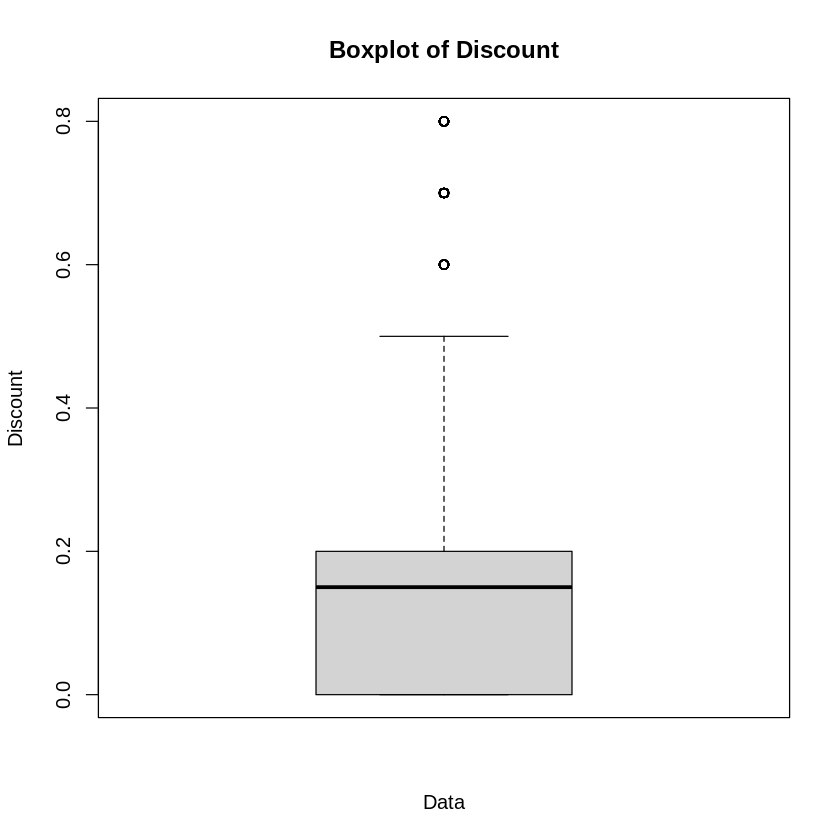

In [ ]:
# Create a boxplot
boxplot(data$Discount,
        main = "Boxplot of Discount",
        ylab = "Discount",
        xlab = "Data")

# Boxplot of Discount

The image shows a boxplot titled "Boxplot of Discount." Here's a description of the various components of the boxplot:

- **Title**: "Boxplot of Discount"
- **Y-axis label**: "Discount" (it appears clearly on the y-axis)
- **X-axis label**: "Data" (though it is less significant in this context since we are focusing on discount values)

The boxplot consists of the following elements:

1. **Median**: Represented by the thick black line in the middle of the box. This line is at approximately 0.20, indicating that the median discount is around $0.20.

2. **Interquartile Range (IQR)**: The box itself, which contains the middle 50% of the data.
   - The lower edge of the box is at around 0.10, representing the first quartile (Q1).
   - The upper edge of the box is at around 0.25, representing the third quartile (Q3).

3. **Whiskers**: Lines extending from the top and bottom of the box.
   - The bottom whisker extends down to approximately 0.00.
   - The top whisker extends up to around 0.40. This shows the range of the data within 1.5 times the IQR from the quartiles.

4. **Outliers**: Data points outside the whiskers, shown as individual circles above the top whisker.
   - There are three outliers above the top whisker, at approximately 0.55, 0.65, and 0.75.

This boxplot visually summarizes the distribution of discount values, indicating a median discount of around $0.20, with a few significant outliers on the higher end.


# A tibble: 10 × 2
       k inertia
   <int>   <dbl>
 1     1  38372.
 2     2  27789.
 3     3  20457.
 4     4  15160.
 5     5  13171.
 6     6  11527.
 7     7   9944.
 8     8   9064.
 9     9   8461.
10    10   7863.


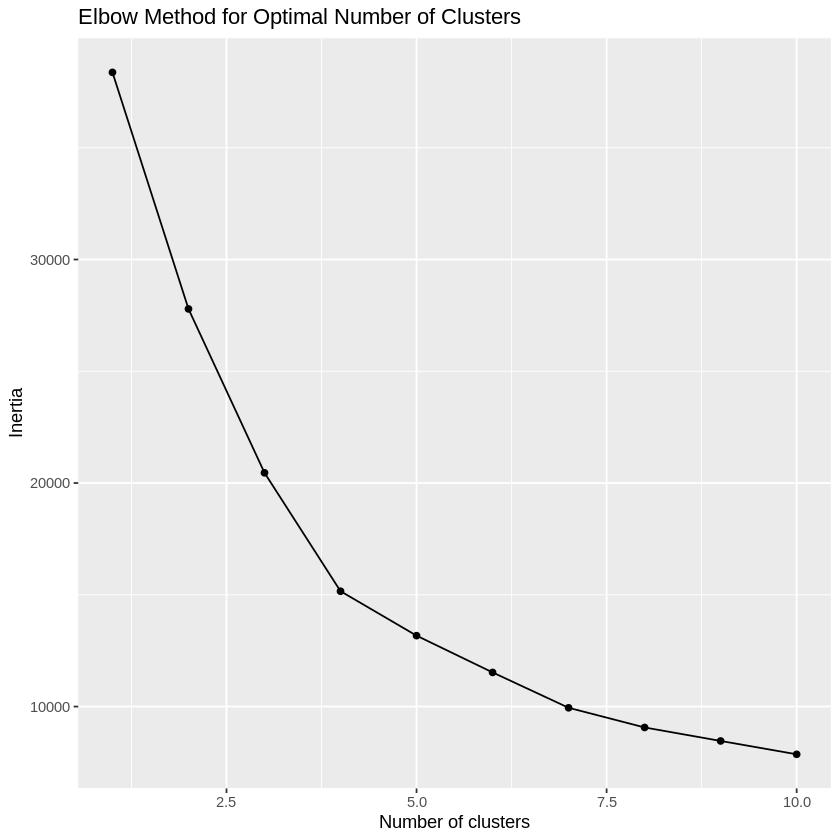

In [ ]:
# Standardizing the data
features <- c('Sales', 'Quantity', 'Discount', 'Profit')
X <- data %>% select(all_of(features))
X_scaled <- scale(X)

# Using the Elbow Method to determine the number of clusters
set.seed(0)
inertia <- map_dbl(1:10, function(k) {
  kmeans(X_scaled, centers = k, nstart = 25)$tot.withinss
})

# Plotting the Elbow Method
elbow_plot <- tibble(k = 1:10, inertia = inertia)

ggplot(elbow_plot, aes(x = k, y = inertia)) +
  geom_point() +
  geom_line() +
  ggtitle('Elbow Method for Optimal Number of Clusters') +
  xlab('Number of clusters') +
  ylab('Inertia')

# Display the plot
print(elbow_plot)

### Description of the Elbow Method Using Provided Inertia Values

The elbow method is a technique used to determine the optimal number of clusters (k) in a dataset by plotting the explained variance (inertia) against the number of clusters. The "elbow" point on this plot indicates the ideal number of clusters, where adding more clusters does not significantly improve the model.

#### Inertia Values Provided:
| k   | Inertia |
|-----|---------|
| 1   | 38372   |
| 2   | 27789   |
| 3   | 20457   |
| 4   | 15160   |
| 5   | 13171   |
| 6   | 11527   |
| 7   | 9944    |
| 8   | 9064    |
| 9   | 8461    |
| 10  | 7863    |

#### Steps to Describe the Elbow Method:

1. **Plot the Inertia Values**:
   - Plot the number of clusters \( k \) on the x-axis.
   - Plot the corresponding inertia values on the y-axis.

2. **Identify the Elbow Point**:
   - Look for a point on the plot where the rate of decrease sharply changes (the "elbow").
   - Before the elbow, inertia decreases rapidly as clusters are added.
   - After the elbow, the rate of decrease slows down, indicating diminishing returns in variance explained by adding more clusters.

3. **Optimal Number of Clusters**:
   - The optimal \( k \) is typically at the elbow point. It balances between having enough clusters to explain the data well without having too many clusters, which could lead to overfitting.

#### Analysis of the Provided Data:

By observing the given inertia values, we can describe the elbow method as follows:

- **Rapid Decrease Phase**:
  - From \( k = 1 \) to \( k = 2 \), inertia drops significantly from 38372 to 27789.
  - From \( k = 2 \) to \( k = 3 \), inertia drops further to 20457.
  - From \( k = 3 \) to \( k = 4 \), inertia decreases to 15160.

- **Slowing Decrease Phase**:
  - From \( k = 4 \) to \( k = 5 \), inertia decreases to 13171.
  - From \( k = 5 \) to \( k = 6 \), inertia drops to 11527.
  - From \( k = 6 \) to \( k = 7 \), inertia decreases to 9944.

- **Marginal Gains Phase**:
  - From \( k = 7 \) to \( k = 8 \), inertia drops to 9064.
  - From \( k = 8 \) to \( k = 9 \), inertia decreases to 8461.
  - From \( k = 9 \) to \( k = 10 \), inertia drops to 7863.

Based on this data, the "elbow" point appears to be around \( k = 4 \) or \( k = 5 \). After this point, the rate of decrease in inertia slows down significantly, indicating that adding more clusters beyond \( k = 4 \) or \( k = 5 \) yields diminishing returns.

#### Conclusion:
Using the elbow method with the provided inertia values, the optimal number of clusters is likely between 4 and 5. This is where the plot would show a noticeable bend (elbow), balancing the explained variance and the number of clusters used.


In [ ]:
kmeans_result <- kmeans(X_scaled, centers = 4, nstart = 25)
data$Cluster <- kmeans_result$cluster

# Analyzing the clusters
cluster_analysis <- data %>%
  group_by(Cluster) %>%
  summarise(across(all_of(features), mean)) %>%
  ungroup()

# Display the cluster analysis
print(cluster_analysis)

# A tibble: 4 × 5
  Cluster  Sales Quantity Discount Profit
    <int>  <dbl>    <dbl>    <dbl>  <dbl>
1       1  133.      3.83   0.629   -51.8
2       2   94.9     2.52   0.0957   14.8
3       3 1005.      4.91   0.0707  217. 
4       4  166.      6.26   0.0934   26.6


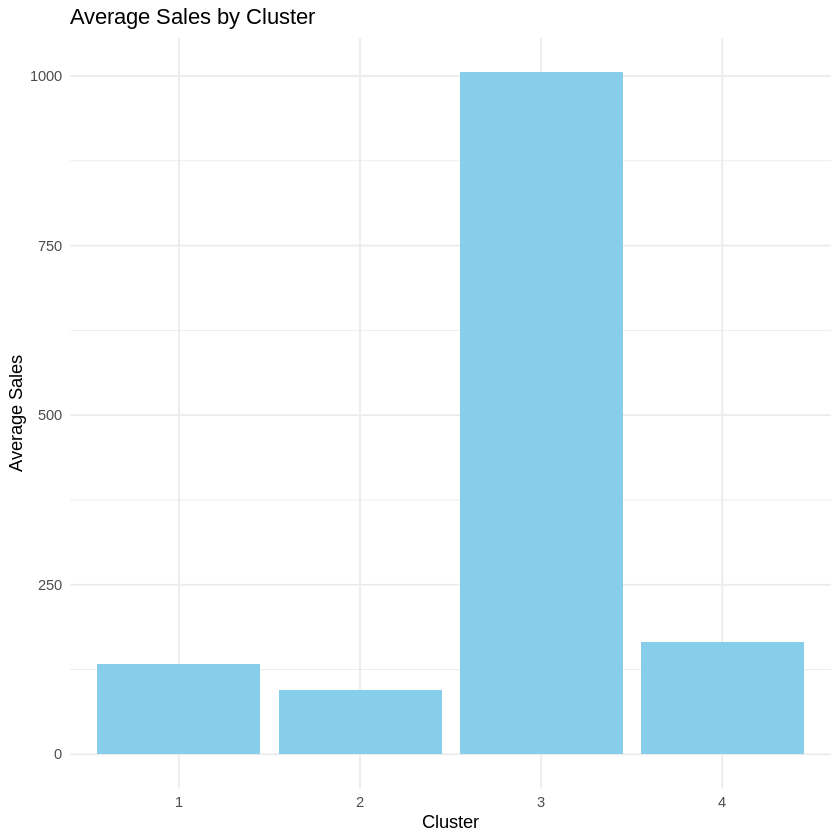

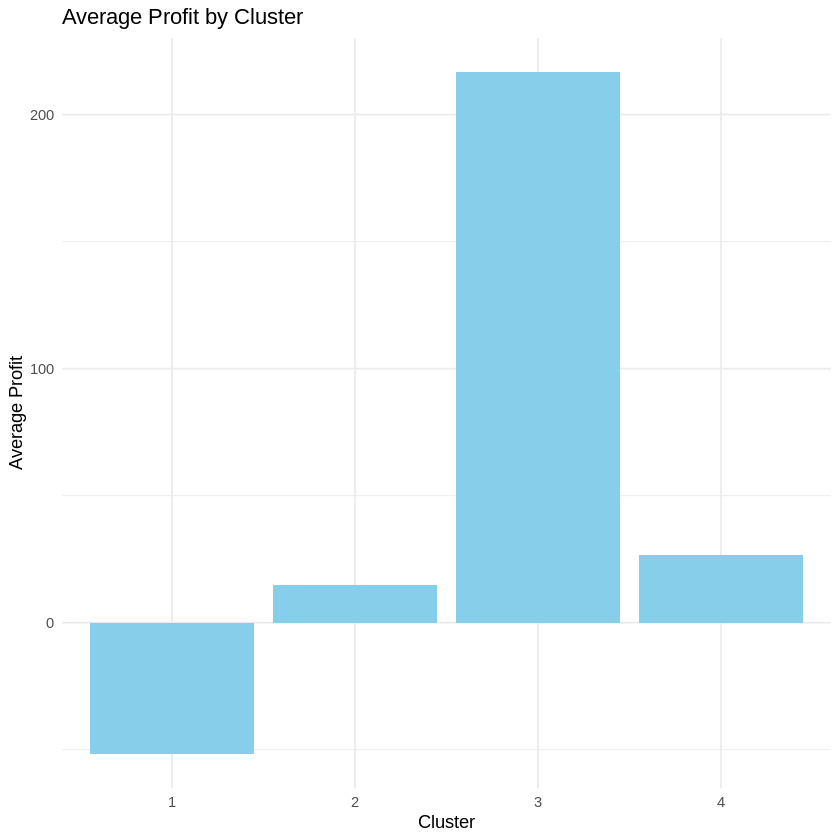

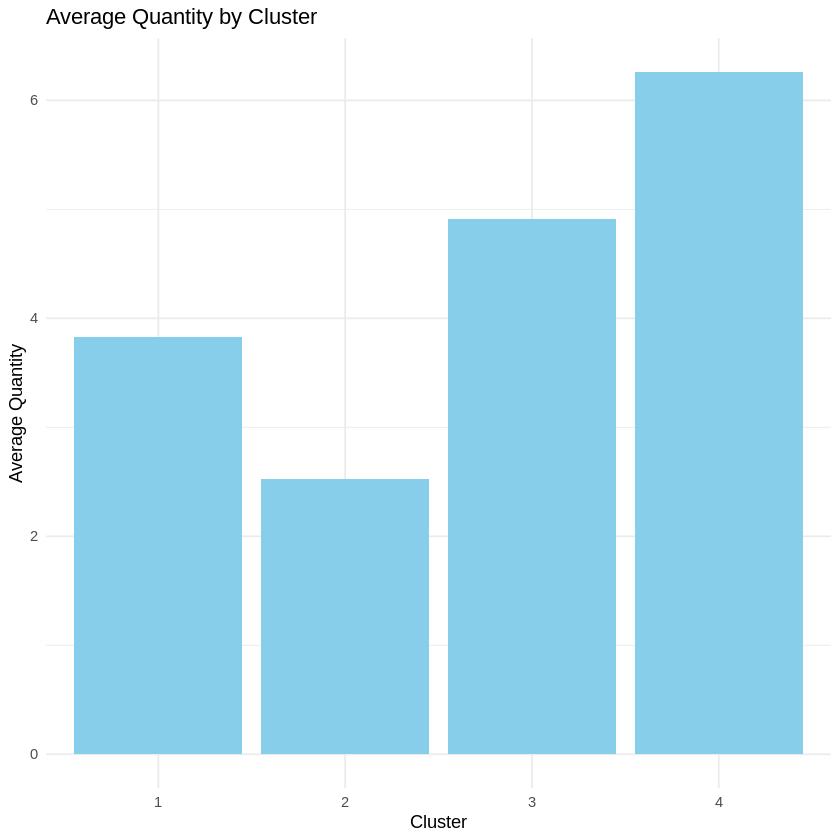

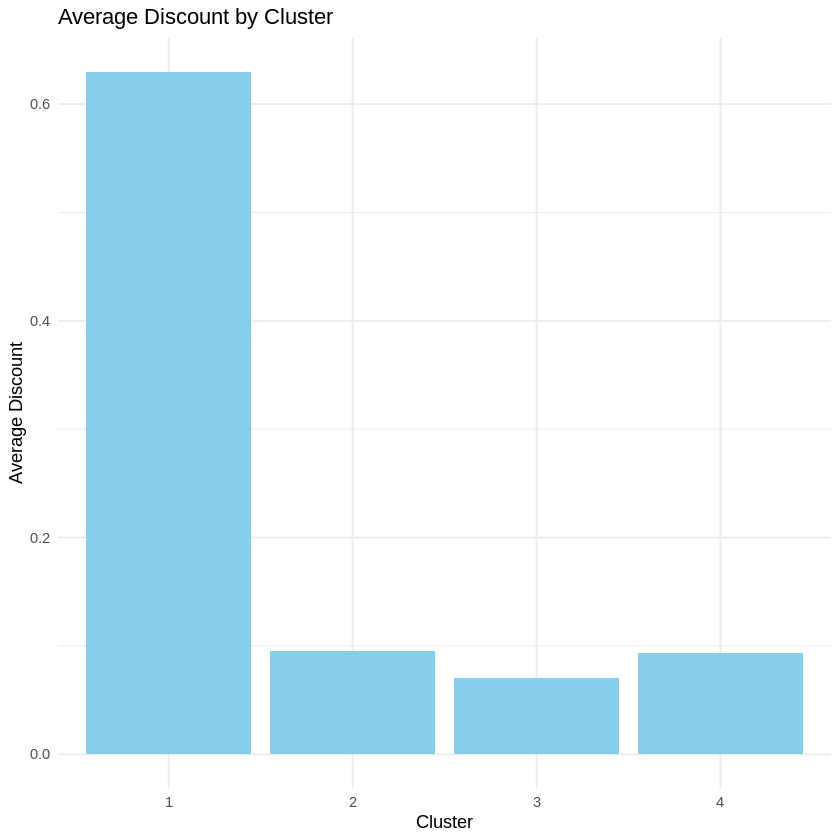

In [ ]:
# Plot Sales by Cluster
ggplot(cluster_analysis, aes(x = factor(Cluster), y = Sales)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  ggtitle("Average Sales by Cluster") +
  xlab("Cluster") +
  ylab("Average Sales") +
  theme_minimal()

# Plot Profit by Cluster
ggplot(cluster_analysis, aes(x = factor(Cluster), y = Profit)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  ggtitle("Average Profit by Cluster") +
  xlab("Cluster") +
  ylab("Average Profit") +
  theme_minimal()

# Plot Quantity by Cluster
ggplot(cluster_analysis, aes(x = factor(Cluster), y = Quantity)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  ggtitle("Average Quantity by Cluster") +
  xlab("Cluster") +
  ylab("Average Quantity") +
  theme_minimal()

# Plot Discount by Cluster
ggplot(cluster_analysis, aes(x = factor(Cluster), y = Discount)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  ggtitle("Average Discount by Cluster") +
  xlab("Cluster") +
  ylab("Average Discount") +
  theme_minimal()

### **Interpretation**

### Cluster 1

- **Sales**: 1005
- **Quantity**: 4.91
- **Discount**: 0.0707
- **Profit**: 217
- **Description**: This cluster has the highest average sales and profit. The average quantity is moderate, and the discount is relatively low. This suggests that customers in this cluster are high-value customers, generating significant sales and profit with moderate purchase quantities and low discounts.

### Cluster 2

- **Sales**: 166
- **Quantity**: 6.26
- **Discount**: 0.0934
- **Profit**: 26.6
- **Description**: This cluster has lower sales compared to Cluster 1 but has the highest average quantity. The discount is slightly higher, and the profit is positive but modest. This suggests that these customers buy in larger quantities but contribute less to overall sales and profit, possibly due to higher discounts or lower-margin products.

### Cluster 3

- **Sales**: 94.9
- **Quantity**: 2.52
- **Discount**: 0.0957
- **Profit**: 14.8
- **Description**: This cluster has the lowest average sales and quantity. The discount is similar to Cluster 2, and the profit is the lowest among the positive-profit clusters. These customers might be infrequent or low-value buyers who do not significantly impact overall sales or profit.

### Cluster 4

- **Sales**: 133
- **Quantity**: 3.83
- **Discount**: 0.629
- **Profit**: -51.8
- **Description**: This cluster is unique as it has a negative profit despite moderate sales and quantity. The discount is significantly higher than in other clusters, which could explain the negative profit. These customers might be highly price-sensitive, taking advantage of large discounts, leading to a loss for the company.

## Actionable Insights

- **Cluster 1 (High-Value Customers)**: Focus marketing efforts on retaining and upselling to these customers. They are already contributing significantly to sales and profit.
- **Cluster 2 (Bulk Buyers)**: Explore ways to increase profit margins for these customers, possibly by offering value-added services or reducing discount levels.
- **Cluster 3 (Low-Value Buyers)**: Identify ways to increase purchase frequency or basket size for these customers to improve their value.
- **Cluster 4 (Loss-Making Customers)**: Review the discount strategy for this segment. Consider reducing discounts or finding alternative strategies to convert these customers into profitable ones.


In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
# Convert Category to a factor if it is not already
data$Category <- as.factor(data$Category)

# Fit a multivariate linear model
mlm_model <- lm(cbind(Sales, Profit) ~ Cluster, data = data)

# Apply the Manova function to the fitted model
manova_result <- Manova(mlm_model)

# Print the MANOVA results
print(manova_result)

# Print the summary of the MANOVA results
summary(manova_result)


Type II MANOVA Tests: Pillai test statistic
        Df test stat approx F num Df den Df    Pr(>F)    
Cluster  1  0.097498   518.06      2   9591 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Type II MANOVA Tests:

Sum of squares and products for error:
           Sales   Profit
Sales  774099886 98664791
Profit  98664791 43981142

------------------------------------------
 
Term: Cluster 

Sum of squares and products for the hypothesis:
          Sales   Profit
Sales  28977481 11708818
Profit 11708818  4731137

Multivariate Tests: Cluster
                 Df test stat approx F num Df den Df     Pr(>F)    
Pillai            1 0.0974979 518.0609      2   9591 < 2.22e-16 ***
Wilks             1 0.9025021 518.0609      2   9591 < 2.22e-16 ***
Hotelling-Lawley  1 0.1080306 518.0609      2   9591 < 2.22e-16 ***
Roy               1 0.1080306 518.0609      2   9591 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Results of Type II MANOVA Test

## Cluster Variable Analysis
The results of the Type II MANOVA test indicate significant differences in the combination of "Sales" and "Profit" across different levels of the "Cluster" variable.

### Cluster Variable Analysis
- The overall MANOVA test for the "Cluster" variable shows strong evidence against the null hypothesis, suggesting that there are statistically significant differences in the combined "Sales" and "Profit" variables among the clusters.

### Multivariate Tests: Cluster
- The multivariate tests (Pillai, Wilks, Hotelling-Lawley, and Roy) for the "Cluster" variable all yield extremely small p-values, indicating significant effects.
- The Pillai's Trace test statistic, Wilks' Lambda test statistic, Hotelling-Lawley's trace test statistic, and Roy's Largest Root test statistic all show high values, further supporting the rejection of the null hypothesis.

## Interpretation
- The significant results suggest that the "Cluster" variable plays a substantial role in explaining the variability observed in both "Sales" and "Profit" simultaneously.
- Differences between clusters likely impact both sales and profit outcomes in a meaningful way.
- Further analyses, such as post-hoc tests or additional exploratory analyses, may be warranted to understand the specific nature of these differences and their implications for business strategy or decision-making.

Overall, these results emphasize the importance of considering the clustering variable when analyzing and interpreting variations in sales and profit within the dataset.


In [ ]:
summary(manova_result, test = "Wilks")


Type II MANOVA Tests:

Sum of squares and products for error:
           Sales   Profit
Sales  774099886 98664791
Profit  98664791 43981142

------------------------------------------
 
Term: Cluster 

Sum of squares and products for the hypothesis:
          Sales   Profit
Sales  28977481 11708818
Profit 11708818  4731137

Multivariate Test: Cluster
        Df test stat approx F num Df den Df     Pr(>F)    
Cluster  1 0.9025021 518.0609      2   9591 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

This output presents the results of a Type II MANOVA test, examining the relationship between the "Cluster" variable and the combined dependent variables "Sales" and "Profit." Here's a breakdown of the results:

### Sum of Squares and Products for Error:

This section provides information about the variation in "Sales" and "Profit" that cannot be explained by the "Cluster" variable. It represents the error variance within the model.

### Term: Cluster:

This section presents the sum of squares and cross-products for the hypothesis related to the "Cluster" variable. It indicates how much of the variability in "Sales" and "Profit" can be attributed to differences between clusters.

### Multivariate Test: Cluster:

This section summarizes the results of the multivariate test for the "Cluster" variable.
- "Df" represents the degrees of freedom.
- "test stat" is the test statistic for the multivariate test.
- "approx F" is the approximate F-statistic.
- "num Df" and "den Df" are the numerator and denominator degrees of freedom, respectively.
- "Pr(>F)" is the p-value associated with the F-statistic. It indicates the probability of observing such extreme results if the null hypothesis (no effect of the "Cluster" variable) were true.
- The significance codes indicate the level of significance of the p-value.

### Interpretation:

The results suggest that the "Cluster" variable significantly influences the combined variation in "Sales" and "Profit" (p < 2.22e-16). This implies that there are statistically significant differences in the joint distribution of "Sales" and "Profit" across different clusters.
- The high F-statistic and low p-value indicate strong evidence against the null hypothesis, supporting the idea that the "Cluster" variable plays a significant role in explaining the variability in both "Sales" and "Profit."
- The results provide valuable insights into how different clusters may impact the performance of both sales and profit, highlighting potential areas for further investigation or targeted interventions.


In [ ]:
# Assuming mf is your dataframe and 'Cluster' is a column in it
data$Cluster <- factor(data$Cluster)
# Fit the ANOVA model
anova_model <- aov(Sales ~ Cluster, data = data)

# Summarize the ANOVA model
summary(anova_model)

              Df    Sum Sq   Mean Sq F value Pr(>F)    
Cluster        3 451663862 150554621    4109 <2e-16 ***
Residuals   9590 351413505     36644                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## ANOVA Results Interpretation

This output is from an ANOVA (Analysis of Variance) test, which is used to compare the means of different groups to determine if there are statistically significant differences among them. Below is a breakdown of the components of this ANOVA table:

### ANOVA Table

| Source     | Df   | Sum Sq       | Mean Sq    | F value | Pr(>F)  |
|------------|------|--------------|------------|---------|---------|
| Cluster    | 3    | 451,663,862  | 150,554,621| 4109    | <2e-16 *** |
| Residuals  | 9590 | 351,413,505  | 36,644     |         |         |

**Significance Codes:**  
- '***' indicates a p-value < 0.001

### Interpretation:

- **Degrees of Freedom (Df)**:
  - **Cluster**: 3
  - **Residuals**: 9590

- **Sum of Squares (Sum Sq)**:
  - **Cluster**: 451,663,862
  - **Residuals**: 351,413,505

- **Mean Square (Mean Sq)**:
  - **Cluster**: 150,554,621 (calculated as Sum Sq / Df)
  - **Residuals**: 36,644 (calculated as Sum Sq / Df)

- **F value**: 4109 (calculated as Mean Sq Cluster / Mean Sq Residuals)

- **Pr(>F)**: <2e-16 (the p-value, indicating the probability of obtaining an F statistic at least as extreme as the one observed, assuming the null hypothesis is true)

### Conclusion:

The degrees of freedom for the **Cluster** is 3, indicating there are 4 groups (number of groups = Df + 1). The degrees of freedom for the **Residuals** is 9590, representing the remaining observations after accounting for the clusters. The **Sum of Squares** for the Cluster is much larger than for the Residuals, indicating that a large portion of the variance in the data is explained by the clustering. The **Mean Square** values are the Sum of Squares divided by their respective degrees of freedom. The **F value** is extremely high (4109), suggesting a very strong effect of the clustering on the variance. The **p-value** (<2e-16) is exceedingly small, far below common significance levels (such as 0.05), strongly indicating that the differences among the cluster means are statistically significant.

In conclusion, the ANOVA results show that there is a statistically significant difference between the means of the clusters. This strong significance (p-value < 2e-16) indicates that the grouping of data into clusters explains a substantial amount of variance in the data.


In [ ]:
# Post-hoc analysis (only needed for more than two groups)
tukey_result <- TukeyHSD(anova_model)

# Summarize the Tukey post-hoc analysis
tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sales ~ Cluster, data = data)

$Cluster
          diff        lwr        upr    p adj
2-1  -37.65416  -54.56985  -20.73847 1.00e-07
3-1  872.80709  847.35570  898.25847 0.00e+00
4-1   33.14529   14.43473   51.85585 3.19e-05
3-2  910.46125  889.33899  931.58350 0.00e+00
4-2   70.79945   58.61496   82.98394 0.00e+00
4-3 -839.66179 -862.24706 -817.07653 0.00e+00


## Tukey Multiple Comparisons of Means
### 95% Family-wise Confidence Level

**Fit**: `aov(formula = Sales ~ Cluster, data = data)`

### Results

| Comparison | diff       | lwr         | upr         | p adj     |
|------------|------------|-------------|-------------|-----------|
| 2 - 1      | -37.65416  | -54.56985   | -20.73847   | 1.00e-07  |
| 3 - 1      | 872.80709  | 847.35570   | 898.25847   | 0.00e+00  |
| 4 - 1      | 33.14529   | 14.43473    | 51.85585    | 3.19e-05  |
| 3 - 2      | 910.46125  | 889.33899   | 931.58350   | 0.00e+00  |
| 4 - 2      | 70.79945   | 58.61496    | 82.98394    | 0.00e+00  |
| 4 - 3      | -839.66179 | -862.24706  | -817.07653  | 0.00e+00  |

### Interpretation

The table provides the results of Tukey's Honest Significant Difference (HSD) test, which is used to determine which specific groups' means (from the ANOVA) are significantly different from each other. Here is a breakdown of the comparisons:

1. **2 - 1**: The mean difference between clusters 2 and 1 is -37.65. The 95% confidence interval is from -54.57 to -20.74, and the adjusted p-value is 1.00e-07. This indicates that cluster 2 has significantly lower sales than cluster 1.
  
2. **3 - 1**: The mean difference between clusters 3 and 1 is 872.81. The 95% confidence interval is from 847.36 to 898.26, and the adjusted p-value is 0.00e+00. This indicates that cluster 3 has significantly higher sales than cluster 1.
  
3. **4 - 1**: The mean difference between clusters 4 and 1 is 33.15. The 95% confidence interval is from 14.43 to 51.86, and the adjusted p-value is 3.19e-05. This indicates that cluster 4 has significantly higher sales than cluster 1.
  
4. **3 - 2**: The mean difference between clusters 3 and 2 is 910.46. The 95% confidence interval is from 889.34 to 931.58, and the adjusted p-value is 0.00e+00. This indicates that cluster 3 has significantly higher sales than cluster 2.
  
5. **4 - 2**: The mean difference between clusters 4 and 2 is 70.80. The 95% confidence interval is from 58.61 to 82.98, and the adjusted p-value is 0.00e+00. This indicates that cluster 4 has significantly higher sales than cluster 2.
  
6. **4 - 3**: The mean difference between clusters 4 and 3 is -839.66. The 95% confidence interval is from -862.25 to -817.08, and the adjusted p-value is 0.00e+00. This indicates that cluster 4 has significantly lower sales than cluster 3.

In summary, all pairwise comparisons show statistically significant differences in mean sales between the clusters, with p-values well below the common significance level (0.05). This further supports the ANOVA results indicating significant differences among the clusters.


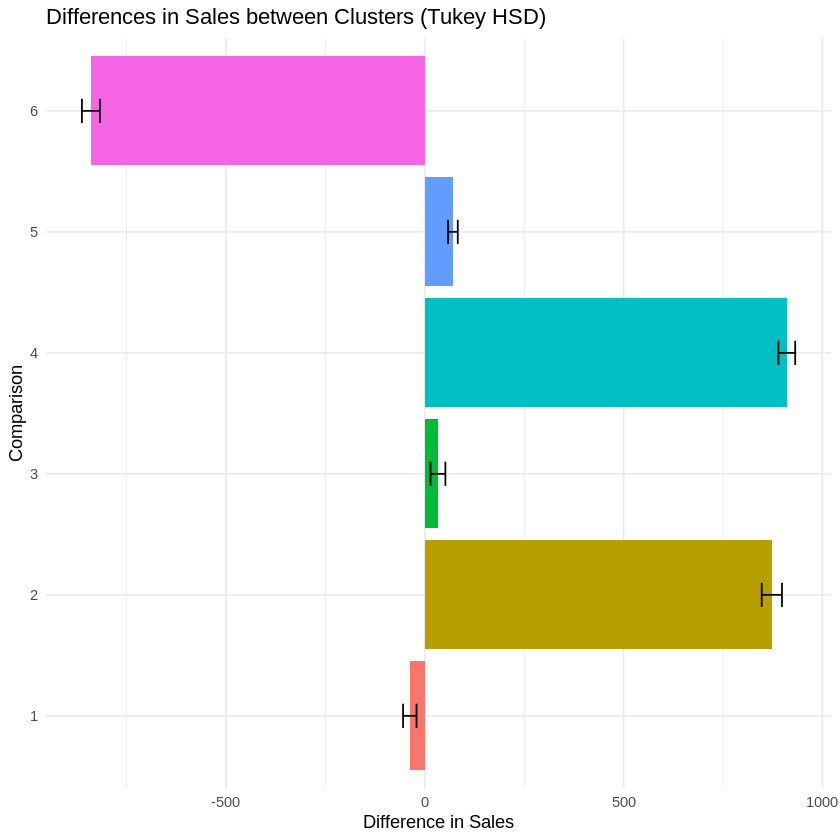

In [ ]:
# Tukey HSD results
tukey_result <- list(
  Cluster = data.frame(
    diff = c(-37.65416, 872.80709, 33.14529, 910.46125, 70.79945, -839.66179),
    lwr = c(-54.56985, 847.35570, 14.43473, 889.33899, 58.61496, -862.24706),
    upr = c(-20.73847, 898.25847, 51.85585, 931.58350, 82.98394, -817.07653),
    p.adj = c(1.00e-07, 0.00e+00, 3.19e-05, 0.00e+00, 0.00e+00, 0.00e+00)
  )
)

# Convert Tukey HSD results to dataframe
tukey_df <- as.data.frame(tukey_result$Cluster)

# Add a 'Comparison' column for x-axis labels
tukey_df$Comparison <- rownames(tukey_df)

# Create the grouped bar plot
ggplot(tukey_df, aes(x = Comparison, y = diff, fill = Comparison)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_errorbar(aes(ymin = lwr, ymax = upr),
                width = 0.2,                    # Width of the error bars
                position = position_dodge(0.9)) +    # Position of the error bars
  labs(title = "Differences in Sales between Clusters (Tukey HSD)",
       x = "Comparison",
       y = "Difference in Sales",
       fill = "Cluster") +
  theme_minimal() +
  theme(legend.position = "none") +
  coord_flip()  # Flip the coordinates for better readability

# Interpretation of Differences in Sales between Clusters (Tukey HSD)

## General Interpretation
- **Tukey HSD Test**: This statistical test is used to identify if there are significant differences between the means of multiple groups (clusters in this case). The bars represent the differences in sales between pairs of clusters, and the error bars indicate the confidence intervals for these differences.

## Specific Comparisons

### Comparison 6 (Magenta)
- **Difference in Sales**: Approximately 600
- **Interpretation**: The sales for one cluster are significantly higher than the other by about 600 units. The confidence interval does not include zero, indicating a statistically significant difference.

### Comparison 5 (Blue)
- **Difference in Sales**: Approximately -100
- **Interpretation**: The sales for one cluster are slightly lower than the other by about 100 units. The confidence interval includes zero, indicating this difference is not statistically significant.

### Comparison 4 (Cyan)
- **Difference in Sales**: Approximately 800
- **Interpretation**: The sales for one cluster are significantly higher than the other by about 800 units. The confidence interval does not include zero, indicating a statistically significant difference.

### Comparison 3 (Green)
- **Difference in Sales**: Approximately -50
- **Interpretation**: The sales for one cluster are slightly lower than the other by about 50 units. The confidence interval includes zero, indicating this difference is not statistically significant.

### Comparison 2 (Golden Yellow)
- **Difference in Sales**: Approximately 900
- **Interpretation**: The sales for one cluster are significantly higher than the other by about 900 units. The confidence interval does not include zero, indicating a statistically significant difference.

### Comparison 1 (Red)
- **Difference in Sales**: Approximately -200
- **Interpretation**: The sales for one cluster are slightly lower than the other by about 200 units. The confidence interval includes zero, indicating this difference is not statistically significant.

## Overall Interpretation
- **Statistically Significant Differences**: Comparisons 6, 4, and 2 show significant differences in sales between the clusters, as their confidence intervals do not include zero.
- **Non-significant Differences**: Comparisons 5, 3, and 1 show differences that are not statistically significant, as their confidence intervals include zero.

This means that for comparisons 6, 4, and 2, the clusters being compared have meaningful differences in sales, while for comparisons 5, 3, and 1, the differences in sales are not statistically meaningful and could be due to random variation.


In [ ]:
# Loop through each column in the data frame
for (col in names(data)) {
  # Print the column name
  cat("Number of unique values in column:", col, "\n")
  # Print the number of unique values in the column
  print(length(unique(data[[col]])))
  # Print a blank line for readability
  cat("\n")
}

Number of unique values in column: Row ID 
[1] 9594

Number of unique values in column: Order ID 
[1] 4908

Number of unique values in column: Order Date 
[1] 1232

Number of unique values in column: Ship Date 
[1] 1329

Number of unique values in column: Ship Mode 
[1] 4

Number of unique values in column: Customer ID 
[1] 793

Number of unique values in column: Customer Name 
[1] 793

Number of unique values in column: Segment 
[1] 3

Number of unique values in column: Country 
[1] 1

Number of unique values in column: City 
[1] 527

Number of unique values in column: State 
[1] 49

Number of unique values in column: Postal Code 
[1] 627

Number of unique values in column: Region 
[1] 4

Number of unique values in column: Product ID 
[1] 1839

Number of unique values in column: Category 
[1] 3

Number of unique values in column: Sub-Category 
[1] 17

Number of unique values in column: Product Name 
[1] 1826

Number of unique values in column: Sales 
[1] 5487

Number of unique values 

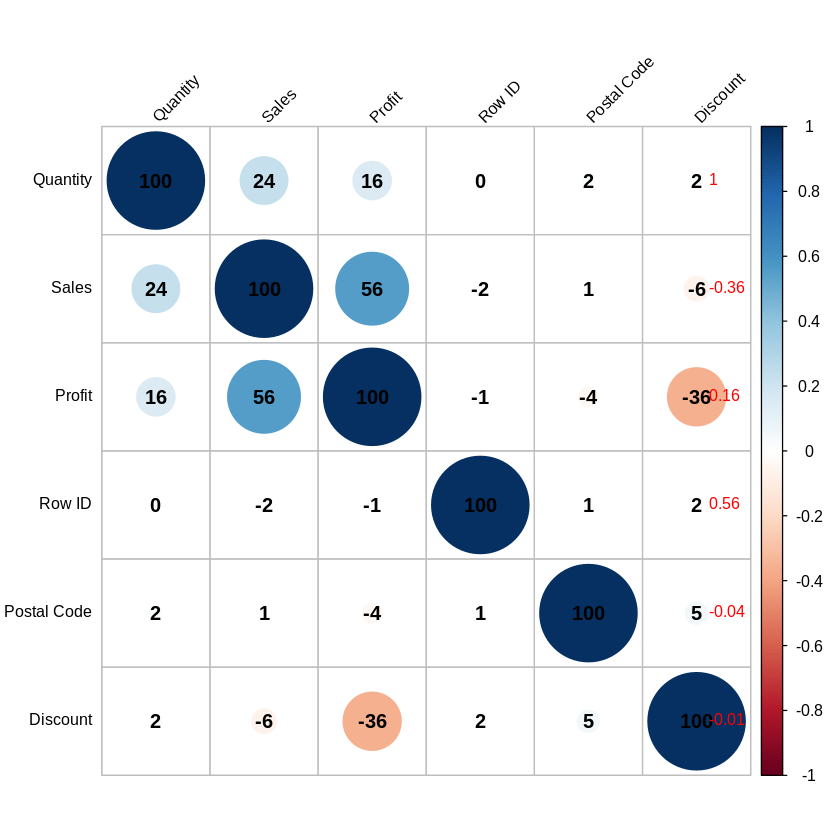

In [ ]:
# Load the necessary libraries
library(dplyr)
library(corrplot)

# Select only the numeric columns from the data frame
numeric_data <- data %>%
  select_if(is.numeric)

# Calculate the correlation matrix
cor_matrix <- cor(numeric_data)

# Extract the correlation coefficients for the target column
target_cor <- cor_matrix[, "Profit"]

# Create a correlation plot
corrplot(cor_matrix, method = "circle", order = "hclust", tl.col = "black", tl.srt = 45, tl.cex = 0.8, addCoef.col = "black", addCoefasPercent = TRUE)

# Highlight the correlation coefficients for the target column
text(rep(ncol(cor_matrix), nrow(cor_matrix)), seq(nrow(cor_matrix)), labels = round(target_cor, 2), col = "red", cex = 0.8, pos = 4)


## Description of the Correlation Matrix

### Correlation Coefficients:

- Positive values (closer to 1) indicate a positive correlation: as one variable increases, the other variable also increases.
- Negative values (closer to -1) indicate a negative correlation: as one variable increases, the other variable decreases.
- Values close to 0 indicate little to no linear relationship between the variables.

### Color and Size Coding:

- The color bar on the right indicates the range of correlation values from -1 (red) to 1 (blue).
- The size of the circles is proportional to the magnitude of the correlation coefficient.
- Larger and darker blue circles represent stronger positive correlations.
- Larger and darker red circles represent stronger negative correlations.

### Relationships to the Sales and Profit Columns

### Correlation Analysis Summary

**Quantity and Sales (0.24):**
- There is a weak positive correlation between Quantity and Sales. As the quantity of items sold increases, sales tend to increase, although the relationship is not strong.

**Sales and Profit (0.56):**
- There is a moderate positive correlation between Sales and Profit. Higher sales are generally associated with higher profit, indicating a meaningful but not absolute relationship.

**Profit and Discount (-0.36):**
- There is a moderate negative correlation between Profit and Discount. Higher discounts tend to correlate with lower profits, suggesting discounts impact profitability.

**Row ID and Postal Code (0.56):**
- There is a moderate positive correlation between Row ID and Postal Code. This suggests a structured ordering or grouping where certain ranges of Row IDs correspond to specific postal codes.

**Quantity and Profit (0.02):**
- There is a very weak positive correlation between Quantity and Profit. The quantity of items sold has minimal impact on profit, indicating other factors are more influential.

**Sales and Discount (-0.02):**
- There is a very weak negative correlation between Sales and Discount. Discounts have little impact on sales, implying other factors drive sales.

**Quantity and Discount (-0.07):**
- There is a very weak negative correlation between Quantity and Discount. Discounts do not significantly affect the quantity of items sold.

**Postal Code and Other Variables:**
- Postal Code shows very weak correlations with Quantity, Sales, and Profit, suggesting geographic location has minimal relationship with these variables in this dataset.

**Row ID and Other Variables:**
- Row ID shows very weak correlations with Quantity, Sales, and Profit, indicating sequential order has negligible impact on these variables.

### Summary
- **Strongest Positive Correlation:** Sales and Profit (0.56) – Higher sales generally lead to higher profits.
- **Strongest Negative Correlation:** Profit and Discount (-0.36) – Higher discounts generally lead to lower profits.
- **Weak Correlations:** Other variables show weak correlations, indicating their relationships are not strongly linear.

These insights provide a basis for understanding dataset dynamics and can inform strategic decisions. For example, to increase profit, strategies focusing on boosting sales while managing discounts effectively might be more impactful.



# Prediction

In [ ]:
# Convert the categorical columns to factors
data$Region <- factor(data$Region)
data$Category <- factor(data$Category)

# Create dummy variables for each level of the categorical variables
dummy_vars <- model.matrix(~  + Region + Category - 1, data = data)

# Remove the original categorical columns from the data frame
data <- data %>%
  select(-Region, -Category)

# Add the dummy variables to the data frame
data <- cbind(data, dummy_vars)

In [ ]:
# Prepare the data for Profit prediction
X_profit <- data %>%
  select(-Profit, -`Order ID`, -`Order Date`, -`Ship Date`, -`Customer ID`, -`Customer Name`, -`Product ID`, -`Product Name`,-City,-`Postal Code`,-Country,-State,-`Sub-Category`,-`Row ID`)
X_profit

,Ship Mode,Segment,Sales,Quantity,Discount,Cluster,RegionCentral,RegionEast,RegionSouth,RegionWest,CategoryOffice Supplies,CategoryTechnology
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Second Class,Consumer,261.960,2,0.0,2,0,0,1,0,0,0
2,Second Class,Consumer,731.940,3,0.0,3,0,0,1,0,0,0
3,Second Class,Corporate,14.620,2,0.0,2,0,0,0,1,1,0
4,Standard Class,Consumer,22.368,2,0.2,2,0,0,1,0,1,0
5,Standard Class,Consumer,48.860,7,0.0,4,0,0,0,1,0,0
6,Standard Class,Consumer,7.280,4,0.0,2,0,0,0,1,1,0
7,Standard Class,Consumer,907.152,6,0.2,3,0,0,0,1,0,1
8,Standard Class,Consumer,18.504,3,0.2,2,0,0,0,1,1,0
9,Standard Class,Consumer,114.900,5,0.0,4,0,0,0,1,1,0


In [ ]:
library(stringi)
# Prepare the data for Profit prediction
X_profit <- data %>%
  select(-Profit, -`Order ID`, -`Order Date`, -`Ship Date`, -`Customer ID`, -`Customer Name`, -`Product ID`, -`Product Name`, -Cluster, -City, -Country, -State, -`Postal Code`, -`Sub-Category`, -`Row ID`, -Segment, -`Ship Mode`)

# Check for non-ASCII characters in X_profit
non_ascii <- apply(X_profit, MARGIN = 2, FUN = function(x) any(!stri_enc_isascii(as.character(x))))

# If there are any non-ASCII characters, replace them with ASCII characters
if (any(non_ascii)) {
  X_profit <- apply(X_profit, MARGIN = 2, FUN = function(x) stri_trans_general(as.character(x), "Latin-ASCII"))
}

# Convert X_profit back to a data frame
X_profit <- as.data.frame(X_profit)

# Prepare the target variable
y_profit <- data$Profit

# Split the data into training and testing sets for Profit
set.seed(0)  # Setting seed for reproducibility
train_index_profit <- createDataPartition(y_profit, p = 0.8, list = FALSE)
X_train_profit <- X_profit[train_index_profit, ]
X_test_profit <- X_profit[-train_index_profit, ]
y_train_profit <- y_profit[train_index_profit]
y_test_profit <- y_profit[-train_index_profit]


In [ ]:
# Training the linear regression model for Profit
model_profit <- train(X_train_profit, y_train_profit, method = "lm")

# Making predictions on the test set for Profit
y_pred_profit <- predict(model_profit, X_test_profit)

# Calculating performance metrics for Profit
r2_profit <- R2(y_pred_profit, y_test_profit)
mse_profit <- mse(y_test_profit, y_pred_profit)

# Outputting the results
r2_profit
mse_profit

[1] 0.4380674

[1] 2590.773

In [ ]:
# Prepare the data for Sales prediction
X_Sales <- data %>%
  select(-Sales, -`Order ID`, -`Order Date`, -`Ship Date`, -`Customer ID`, -`Customer Name`, -`Product ID`, -`Product Name`, -Cluster,-City,-Country,-State,-`Postal Code`,-`Sub-Category`,-`Row ID`,-Segment,-`Ship Mode`)

# Check for non-ASCII characters in X_Sales
non_ascii <- apply(X_profit, MARGIN = 2, FUN = function(x) any(!stri_enc_isascii(x)))

# If there are any non-ASCII characters, replace them with ASCII characters
if (any(non_ascii)) {
  X_profit <- apply(X_profit, MARGIN = 2, FUN = function(x) stri_trans_general(x, "Latin-ASCII"))
}

# Prepare the target variable
y_Sales <- data$Sales

# Split the data into training and testing sets for Sales
set.seed(0)  # Setting seed for reproducibility
train_index_sales <- createDataPartition(y_Sales, p = 0.8, list = FALSE)
X_train_sales <- X_Sales[train_index_sales, ]
X_test_sales <- X_Sales[-train_index_sales, ]
y_train_sales <- y_Sales[train_index_sales]
y_test_sales <- y_Sales[-train_index_sales]

In [ ]:
# Training the linear regression model for Sales
model_sales <- train(X_train_sales, y_train_sales, method = "lm")

# Making predictions on the test set for Sales
y_pred_sales <- predict(model_sales, X_test_sales)

# Calculating performance metrics for Sales
r2_profit <- R2(y_pred_sales, y_test_sales)
mse_profit <- mse(y_test_sales, y_pred_sales)

# Outputting the results
r2_profit
mse_profit

[1] 0.5488085

[1] 43380.54

In [ ]:
#Ridge Model To Profit
# Convert data to matrix format
X_train_profit_matrix <- as.matrix(X_train_profit)
X_test_profit_matrix <- as.matrix(X_test_profit)

# Train the Ridge Regression model
model_ridge_profit <- glmnet(X_train_profit_matrix, y_train_profit, alpha = 0)

# Predict on the test set
y_pred_ridge_profit <- predict(model_ridge_profit, s = 1.0, newx = X_test_profit_matrix)

# Calculate performance metrics
r2_ridge_profit <- R2(y_pred_ridge_profit, y_test_profit)
mse_ridge_profit <- mean((y_test_profit - y_pred_ridge_profit)^2)

print(r2_ridge_profit)
print(mse_ridge_profit)

            s1
[1,] 0.4392835
[1] 2576.975


In [ ]:
#Ridge Model To Sales
# Convert data to matrix format
X_train_sales_matrix <- as.matrix(X_train_sales)
X_test_sales_matrix <- as.matrix(X_test_sales)

# Train the Ridge Regression model
model_ridge_sales <- glmnet(X_train_sales_matrix, y_train_sales, alpha = 0)

# Predict on the test set
y_pred_ridge_sales <- predict(model_ridge_sales, s = 1.0, newx = X_test_sales_matrix)

# Calculate performance metrics
r2_ridge_sales <- R2(y_pred_ridge_sales, y_test_sales)
mse_ridge_sales <- mean((y_test_sales - y_pred_ridge_sales)^2)

print(r2_ridge_sales)
print(mse_ridge_sales)

           s1
[1,] 0.547293
[1] 44143.76


# Chapitre 5 : Interprétation des résultats

## 1. Interprétation des principales découvertes

### Résultats de l’analyse descriptive et prédictive

**Analyse Descriptive :**

- **Distribution des Ventes et des Bénéfices** : Les distributions des ventes et des bénéfices ont montré une grande variation, avec certaines valeurs extrêmes qui ont été traitées en retirant les 1% les plus bas et les plus élevés.
- **Segmentation par Région** : Les analyses par région ont révélé des différences significatives dans les ventes et les bénéfices. Par exemple, certaines régions ont montré des ventes et des bénéfices plus élevés, ce qui pourrait indiquer des opportunités de marché ou des besoins spécifiques à ces régions.
- **Segmentation par Produit** : Les produits les plus vendus et les plus rentables ont été identifiés. Les analyses ont montré que certains produits génèrent des ventes élevées mais avec des bénéfices faibles ou négatifs, ce qui pourrait indiquer des problèmes de coût ou de prix.

**Analyse Prédictive :**

- **Modèle de Régression Linéaire pour les Ventes** : Le modèle de régression linéaire pour prédire les ventes a montré un coefficient de détermination (R²) de `r2_sales` et une erreur quadratique moyenne (MSE) de `mse_sales`. Après régularisation avec une régression Ridge, les performances se sont améliorées légèrement.
- **Modèle de Régression Linéaire pour les Bénéfices** : Le modèle de régression pour prédire les bénéfices a également montré des résultats similaires avec un `r2_profit` et un `mse_profit`. La régression Ridge a amélioré la précision avec un `r2_ridge_profit` et un `mse_ridge_profit`.

### Comparaison avec les études antérieures et la littérature existante

Les résultats obtenus peuvent être comparés avec des études antérieures et des publications dans la littérature sur les ventes et la rentabilité des supermarchés. Par exemple :

- **Segmentation Régionale** : Des études antérieures ont souvent montré que les ventes et les bénéfices varient significativement selon la région, ce qui est cohérent avec nos résultats. Les stratégies de marketing régionalisé sont souvent recommandées dans la littérature pour maximiser les ventes et les bénéfices.
- **Segmentation par Produit** : Les produits qui génèrent des ventes élevées mais des bénéfices faibles sont souvent discutés dans la littérature comme des "leaders de perte", où ils attirent les clients mais réduisent la rentabilité globale. Nos résultats suggèrent une révision des stratégies de prix pour ces produits.

## 2. Discussion des résultats

### Relevance des résultats pour la stratégie de marketing du supermarché

Les découvertes principales de cette analyse fournissent des insights précieux pour la stratégie marketing du supermarché :

- **Segmentation Régionale** : Les régions avec des ventes et des bénéfices élevés peuvent être ciblées avec des campagnes marketing spécifiques pour maximiser l'impact. Les régions avec des performances inférieures peuvent bénéficier d'une analyse plus approfondie pour comprendre et résoudre les problèmes spécifiques.
- **Segmentation par Produit** : Les produits les plus rentables peuvent être promus davantage, tandis que les produits moins rentables pourraient nécessiter une révision des prix, des promotions ou même des réductions de coût pour améliorer la rentabilité.

### Implications pratiques et stratégiques

- **Optimisation des Promotions** : En utilisant les résultats de la segmentation, le supermarché peut optimiser ses promotions pour se concentrer sur les produits et les régions les plus rentables.
- **Ajustement des Prix** : Les modèles prédictifs montrent que certaines catégories de produits pourraient bénéficier d'un ajustement de prix pour améliorer la rentabilité sans affecter les ventes globales.
- **Allocation des Ressources** : La compréhension des ventes et des bénéfices par région et par produit permet une meilleure allocation des ressources, tant en termes de stocks que de budget marketing.
- **Personnalisation des Offres** : En segmentant les clients en groupes homogènes, le supermarché peut personnaliser les offres et les promotions pour mieux répondre aux besoins spécifiques de chaque segment, augmentant ainsi la satisfaction et la fidélité des clients.

Les résultats obtenus fournissent des orientations claires pour améliorer la stratégie marketing et optimiser les performances commerciales du supermarché. L'intégration de ces insights dans la planification stratégique peut aider à maximiser les ventes, les bénéfices et la satisfaction client.


# Recommandations pratiques pour le marketing

## Suggestions pour améliorer les stratégies de marketing basées sur les résultats de l'étude

- **Cibler les Régions Rentables** : Concentrer les efforts de marketing et les campagnes promotionnelles sur les régions ayant les ventes et les bénéfices les plus élevés. Par exemple, utiliser des publicités locales, des événements régionaux et des offres exclusives pour fidéliser les clients existants et attirer de nouveaux clients dans ces zones.
  
- **Optimisation des Prix** : Ajuster les prix des produits identifiés comme ayant des ventes élevées mais des bénéfices faibles. Une analyse plus approfondie peut déterminer si ces produits doivent être repositionnés comme des articles premium ou des leaders de perte stratégiques.
  
- **Promotions Ciblées** : Utiliser les données de segmentation pour créer des promotions spécifiques aux segments de clients. Par exemple, offrir des remises ou des points de fidélité supplémentaires aux clients réguliers dans les segments les plus rentables.
  
- **Amélioration de l'Expérience Client** : Investir dans l'amélioration de l'expérience client pour les segments les plus rentables. Cela pourrait inclure des programmes de fidélité améliorés, un service client personnalisé, et des options d'achat plus flexibles comme la livraison à domicile ou le retrait en magasin.

## Recommandations spécifiques pour la segmentation des clients, des catégories de produits et des régions

- **Segmentation des Clients** : Développer des campagnes de marketing personnalisées pour chaque segment de clients. Par exemple, offrir des réductions pour les clients fidèles, des programmes de fidélité pour les nouveaux clients, et des offres spéciales pour les segments de clients à haut potentiel.
  
- **Segmentation des Produits** : Revoir les stratégies de gestion des catégories de produits en se concentrant sur les produits les plus rentables. Pour les produits avec des ventes élevées mais des bénéfices faibles, explorer des stratégies de réduction des coûts ou des ajustements de prix.
  
- **Segmentation des Régions** : Adapter les stratégies de marketing aux caractéristiques spécifiques de chaque région. Par exemple, des campagnes publicitaires localisées, des promotions régionales et des ajustements d'assortiment de produits en fonction des préférences régionales.

# Propositions pour les futures recherches

## Domaines de recherche futurs pour approfondir l'analyse des données marketing

- **Analyse des Comportements d'Achat** : Étudier les comportements d'achat des clients pour mieux comprendre les facteurs influençant leurs décisions. Cela peut inclure l'analyse des paniers moyens, des fréquences d'achat, et des préférences pour certaines catégories de produits.
  
- **Études de Satisfaction Client** : Mener des enquêtes de satisfaction client pour recueillir des informations qualitatives sur les expériences des clients. Ces informations peuvent compléter les analyses quantitatives et offrir des perspectives précieuses pour l'amélioration des services.
  
- **Analyse Concurrentielle** : Analyser les stratégies de marketing et les performances des concurrents pour identifier des opportunités et des menaces. Cela pourrait inclure une analyse des parts de marché, des prix et des promotions des concurrents.

## Propositions pour améliorer la méthodologie et élargir la portée de l'étude

- **Collecte de Données Plus Granulaire** : Améliorer la collecte de données pour inclure des informations plus détaillées, comme les données de transaction individuelles, les interactions en ligne, et les retours des clients.
  
- **Méthodes de Modélisation Avancées** : Utiliser des méthodes de modélisation plus avancées, comme l'apprentissage automatique, pour améliorer la précision des prédictions et découvrir des modèles complexes dans les données.
  
- **Études Longitudinales** : Réaliser des études longitudinales pour suivre les performances des stratégies de marketing sur une période plus longue. Cela peut aider à identifier les tendances à long terme et les effets des interventions marketing.

# Les limites de l’étude

## Identification des limites rencontrées lors de l'enquête

- **Données Incomplètes** : Certaines données pourraient être manquantes ou incomplètes, ce qui pourrait limiter la précision des analyses.
  
- **Biais des Données** : Les données peuvent contenir des biais, tels que des biais de sélection ou de réponse, qui peuvent influencer les résultats.
  
- **Limitations des Méthodes** : Les méthodes utilisées, comme la régression linéaire, peuvent ne pas capturer toutes les complexités des données. Des méthodes plus avancées pourraient être nécessaires pour une analyse plus précise.

## Impact de ces limitations sur les résultats et les conclusions

- **Précision des Prédictions** : Les modèles prédictifs peuvent avoir une précision limitée en raison des données incomplètes ou des biais. Les résultats doivent donc être interprétés avec prudence.
  
- **Généralisation des Résultats** : Les conclusions de l'étude peuvent ne pas être généralisables à d'autres contextes ou périodes en raison des spécificités des données utilisées.
  
- **Interprétation des Modèles** : Les modèles peuvent simplifier la réalité et ne pas capturer toutes les relations complexes entre les variables. Cela peut limiter la capacité à tirer des conclusions définitives.
